In [1]:
conda install lxml

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         125 KB
    certifi-2020.4.5.1         |           py36_0         155 KB
    libxslt-1.1.33             |       h7d1a2b0_0         426 KB
    lxml-4.5.0                 |   py36hefd8a0e_0         1.4 MB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    ------------------------------------------------------------
                                           Total:         4.6 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               pkgs/main/linux-64::lxml-4.5.0-py36hefd8a0e_0

The following packages will be SUPERSEDED by a higher-priority channel:



In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

### Import the table of high schools in NYC

In [2]:
page = 'https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City'
nyc_hs = pd.read_html(page)

In [3]:
type(nyc_hs)

list

In [4]:
len(nyc_hs)

9

### Three tables were read and the type of the table object was a list of dataframes, so I found the correct table with the schools only in Manhattan and assigned it to df_manhattan_hs. 

In [5]:
nyc_hs[3]

School P.S. Number  \
                                                School P.S. Number   
0                A. Philip Randolph Campus High School        M540   
1                                         Aaron School         NaN   
2                        Abraham Joshua Heschel School         NaN   
3    Academy of Environmental Science Secondary Hig...        M635   
4    Academy for Social Action: A College Board School        M367   
..                                                 ...         ...   
164                                 Xavier High School         NaN   
165            Yeshiva University High School for Boys         NaN   
166                            York Preparatory School         NaN   
167                    Young Women's Leadership School        M610   
168   Washington Heights Expeditionary Learning School        M348   

               Type   Religious Affiliation Website         
               Type   Religious Affiliation NYC DOE School  
0            Public                     NaN   [410]  [411]  
1           Private                     NaN     NaN  [412]  
2    Private, co-ed                  Jewish     NaN  [413]  
3            Public                     NaN   [414]    NaN  
4            Public                     NaN   [415]  [416]  
..              ...                     ...     ...    ...  
164   Private, boys  Roman Catholic, Jesuit     NaN  [635]  
165   Private, boys                  Jewish     NaN  [636]  
166  Private, co-ed                     NaN     NaN  [637]  
167   Public, girls                     NaN   [638]  [639]  
168          Public                     NaN   [640]    NaN  

[169 rows x 6 columns]

In [6]:
df_manhattan_hs=nyc_hs[3]
df_manhattan_hs.head()

School P.S. Number  \
                                              School P.S. Number   
0              A. Philip Randolph Campus High School        M540   
1                                       Aaron School         NaN   
2                      Abraham Joshua Heschel School         NaN   
3  Academy of Environmental Science Secondary Hig...        M635   
4  Academy for Social Action: A College Board School        M367   

             Type Religious Affiliation Website         
             Type Religious Affiliation NYC DOE School  
0          Public                   NaN   [410]  [411]  
1         Private                   NaN     NaN  [412]  
2  Private, co-ed                Jewish     NaN  [413]  
3          Public                   NaN   [414]    NaN  
4          Public                   NaN   [415]  [416]

### Selecting only the columns that are needed. 

In [7]:
df_manhattan_hs=df_manhattan_hs['School']
df_manhattan_hs.head()

,School
0,A. Philip Randolph Campus High School
1,Aaron School
2,Abraham Joshua Heschel School
3,Academy of Environmental Science Secondary Hig...
4,Academy for Social Action: A College Board School


In [8]:
df_manhattan_hs = df_manhattan_hs[df_manhattan_hs.School != 'Not assigned']
df_manhattan_hs.shape

(169, 1)

In [9]:
df_manhattan_hs["Latitude"] = ""
df_manhattan_hs["Longitude"] = ""
df_manhattan_hs.shape

(169, 3)

#### Using geolocator to get the coordinates for each of the high schools and then inserting it in the df_nyc_hs dataframe

In [10]:
y = 0
for n in range(169):
    address = ('{}, New York City'.format(df_manhattan_hs.School[n]))
    #print(address)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    #print(location)
    if location == None:
        continue 
    y = y + 1
    latitude = location.latitude
    longitude = location.longitude
    df_manhattan_hs.Latitude[n] = latitude
    df_manhattan_hs.Longitude[n] = longitude
print(y)

53


In [ ]:
df_manhattan_hs.to_csv('manhattan_hs_gps.csv')

#### I had to manual obtain gps coorinates for some of the high schools, which I inserted in the csv file and them read that data in to the dataframe below.

In [2]:
df_manhattan_hs_gps = pd.read_csv('manhattan_hs_gps.csv', encoding = "ISO-8859-1")
df_manhattan_hs_gps.head()

,School,Latitude,Longitude
0,A. Philip Randolph Campus High School,40.8185,-73.9500
1,Aaron School,40.7448,-73.9837
2,Abraham Joshua Heschel School,40.7723,-73.9897
3,Academy of Environmental Science Secondary Hig...,40.7852,-73.9422
4,Academy for Social Action: A College Board School,40.8154,-73.9553


In [3]:
df_manhattan_hs_gps.shape

(164, 3)

In [73]:
manhattan_map = folium.Map(location=[40.7831, -73.9712], zoom_start=12)
manhattan_map

In [74]:
# instantiate a feature group for the incidents in the dataframe. this is the simpler version
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_manhattan_hs_gps.Latitude, df_manhattan_hs_gps.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
manhattan_map.add_child(incidents)

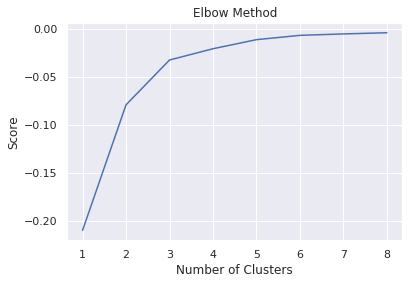

In [4]:
K_clusters = range(1,9)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_manhattan_hs_gps[['Latitude']]
X_axis = df_manhattan_hs_gps[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(df_manhattan_hs_gps[df_manhattan_hs_gps.columns[1:3]]) # Compute k-means clustering.
df_manhattan_hs_gps['cluster_label'] = kmeans.fit_predict(df_manhattan_hs_gps[df_manhattan_hs_gps.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_manhattan_hs_gps[df_manhattan_hs_gps.columns[1:3]]) # Labels of each point
df_manhattan_hs_gps.head(10)

,School,Latitude,Longitude,cluster_label
0,A. Philip Randolph Campus High School,40.818500,-73.950000,1
1,Aaron School,40.744800,-73.983700,0
2,Abraham Joshua Heschel School,40.772300,-73.989700,2
3,Academy of Environmental Science Secondary Hig...,40.785200,-73.942200,1
4,Academy for Social Action: A College Board School,40.815400,-73.955300,1
5,Aichhorn School,40.798780,-73.961040,1
6,The American Sign Language and English Seconda...,40.738370,-73.981370,0
7,Avenues: The World School,40.749410,-74.003310,0
8,Bard High School Early College(see also Bard H...,40.718750,-73.976010,0
9,"Ballet Tech, NYC Public School for Dance",40.738541,-73.989502,0


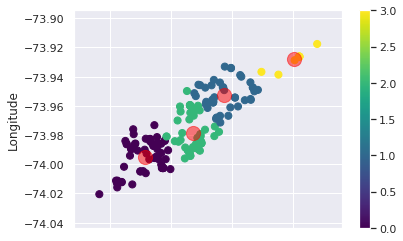

In [6]:
df_manhattan_hs_gps.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [7]:
centers = kmeans.cluster_centers_
print(centers)

[[ 40.72843882 -73.99487752]
 [ 40.79364779 -73.95237077]
 [ 40.7676251  -73.97825865]
 [ 40.85140689 -73.92809222]]


In [8]:
df_cluster_centers = pd.DataFrame({
'lat':[40.72843882, 40.79364779, 40.85140689, 40.7676251],
'lon':[-73.99487752, -73.95237077, -73.92809222, -73.97825865],
'name':['Greenwich Village', 'East Harlem', 'Hudson Heights', 'Columbus Circle']
})
df_cluster_centers

,lat,lon,name
0,40.728439,-73.994878,Greenwich Village
1,40.793648,-73.952371,East Harlem
2,40.851407,-73.928092,Hudson Heights
3,40.767625,-73.978259,Columbus Circle


In [75]:
manhattan_centers_map = folium.Map(location=[40.7831, -73.9712], zoom_start=12)
manhattan_centers_map

In [76]:
# Add cluster centers on the map as markers
for i in range(len(df_cluster_centers)):
    folium.Marker(location=[df_cluster_centers.iloc[i]['lat'], df_cluster_centers.iloc[i]['lon']], popup=folium.Popup(str(df_cluster_centers.iloc[i]['name']),parse_html=True)).add_to(manhattan_centers_map)
manhattan_centers_map

#popup=df_cluster_centers.iloc[i]['name']


#### Define Foursquare Credentials and Version to obtain information regarding existing physical therapy clinics around the centroids. 

In [41]:
CLIENT_ID = 'D2TNDELL4ZR4UNP12VQZSURGJ1Y5UEPYHH32GZGZKDPURFDP' # your Foursquare ID
CLIENT_SECRET = '3ZHR12PFX5CXIIMCUDMFXLAVJHV3JDXFIGXXN0N0BTGBETL3' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
radius = 600
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D2TNDELL4ZR4UNP12VQZSURGJ1Y5UEPYHH32GZGZKDPURFDP
CLIENT_SECRET:3ZHR12PFX5CXIIMCUDMFXLAVJHV3JDXFIGXXN0N0BTGBETL3


In [42]:
#Physical therapy clinics in 500 meters around Colubmus Circle centroid
cc_latitude = 40.767625
cc_longitude = -73.978259
search_query = 'Physical therapy'
cc_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, cc_latitude, cc_longitude, VERSION, search_query, radius, LIMIT)
cc_results = requests.get(cc_url).json()
cc_results

{'meta': {'code': 200, 'requestId': '5eddcb2d9da7ee001b16288f'},
 'response': {'venues': [{'id': '4bbc99578ec3d13a2df01a28',
    'name': 'Professional Physical Therapy',
    'location': {'address': '10 Columbus Cir',
     'crossStreet': '60th Street',
     'lat': 40.76862738011626,
     'lng': -73.98302777680328,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.76862738011626,
       'lng': -73.98302777680328}],
     'distance': 417,
     'postalCode': '10019',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['10 Columbus Cir (60th Street)',
      'New York, NY 10019',
      'United States']},
    'categories': [{'id': '5744ccdfe4b0c0459246b4af',
      'name': 'Physical Therapist',
      'pluralName': 'Physical Therapists',
      'shortName': 'Physical Therapist',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_',
       'suffix': '.png'},
      'primary'

In [43]:
# assign relevant part of JSON to venues
cc_venues = cc_results['response']['venues']

# tranform venues into a dataframe
df_cc = json_normalize(cc_venues)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [44]:
df_cc.shape

(37, 18)

In [45]:
#Physical therapy clinics in 500 meters around East Harlem centroid
eh_latitude = 40.793648
eh_longitude = -73.952371
search_query = 'Physical therapy'
eh_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eh_latitude, eh_longitude, VERSION, search_query, radius, LIMIT)
eh_results = requests.get(eh_url).json()
eh_results

{'meta': {'code': 200, 'requestId': '5eddcb696001fe001b78483d'},
 'response': {'venues': [{'id': '502e8437e4b0d98c30cfc426',
    'name': 'Mount Sinai Physical Therapy & Rehabilitation',
    'location': {'address': '5 E 102nd St Fl 1',
     'crossStreet': 'Madison Avenue',
     'lat': 40.79134457013298,
     'lng': -73.95237443735932,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.79134457013298,
       'lng': -73.95237443735932}],
     'distance': 256,
     'postalCode': '10029',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['5 E 102nd St Fl 1 (Madison Avenue)',
      'New York, NY 10029',
      'United States']},
    'categories': [{'id': '5744ccdfe4b0c0459246b4af',
      'name': 'Physical Therapist',
      'pluralName': 'Physical Therapists',
      'shortName': 'Physical Therapist',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_',
       'suffix'

In [46]:
# assign relevant part of JSON to venues
eh_venues = eh_results['response']['venues']

# tranform venues into a dataframe
df_eh = json_normalize(eh_venues)
df_eh.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,502e8437e4b0d98c30cfc426,Mount Sinai Physical Therapy & Rehabilitation,"[{'id': '5744ccdfe4b0c0459246b4af', 'name': 'P...",v-1591593850,False,5 E 102nd St Fl 1,Madison Avenue,40.791345,-73.952374,"[{'label': 'display', 'lat': 40.79134457013298...",256,10029,US,New York,NY,United States,"[5 E 102nd St Fl 1 (Madison Avenue), New York,..."
1,4fbe7644e4b057d1bdb6f2c4,Academy Physical Therapy,"[{'id': '5744ccdfe4b0c0459246b4af', 'name': 'P...",v-1591593850,False,1160 5th Ave,97th Street,40.788849,-73.955025,"[{'label': 'display', 'lat': 40.78884928995583...",579,10029,US,New York,NY,United States,"[1160 5th Ave (97th Street), New York, NY 1002..."
2,4daf74b504373a986f56e293,All Star Physical Therapy,"[{'id': '5744ccdfe4b0c0459246b4af', 'name': 'P...",v-1591593850,False,158 E 100th St,Between Lexington and Third Ave,40.788215,-73.948880,"[{'label': 'display', 'lat': 40.788215, 'lng':...",672,10029,US,New York,NY,United States,[158 E 100th St (Between Lexington and Third A...


In [47]:
df_eh.shape

(3, 17)

In [48]:
#Physical therapy clinics in 500 meters around Hudson Heights centroid
hh_latitude = 40.851407
hh_longitude = -73.928092
search_query = 'Physical therapy'
hh_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, hh_latitude, hh_longitude, VERSION, search_query, radius, LIMIT)
hh_results = requests.get(hh_url).json()
hh_results

{'meta': {'code': 200, 'requestId': '5eddcb810be7b4001b842f7e'},
 'response': {'venues': [{'id': '4e4a9f9d62847afcaf187562',
    'name': 'Physical Therapy P.C.',
    'location': {'address': '601 W 182nd St',
     'crossStreet': 'St. Nicholas',
     'lat': 40.850131,
     'lng': -73.93353,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.850131,
       'lng': -73.93353}],
     'distance': 479,
     'postalCode': '10033',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['601 W 182nd St (St. Nicholas)',
      'New York, NY 10033',
      'United States']},
    'categories': [{'id': '5744ccdfe4b0c0459246b4af',
      'name': 'Physical Therapist',
      'pluralName': 'Physical Therapists',
      'shortName': 'Physical Therapist',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1591593867'

In [49]:
# assign relevant part of JSON to venues
hh_venues = hh_results['response']['venues']

# tranform venues into a dataframe
df_hh = json_normalize(hh_venues)
df_hh.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4e4a9f9d62847afcaf187562,Physical Therapy P.C.,"[{'id': '5744ccdfe4b0c0459246b4af', 'name': 'P...",v-1591593867,False,601 W 182nd St,St. Nicholas,40.850131,-73.933530,"[{'label': 'display', 'lat': 40.850131, 'lng':...",479,10033,US,New York,NY,United States,"[601 W 182nd St (St. Nicholas), New York, NY 1..."
1,50c787d9e4b0be1974182fbf,Physical Therapy,"[{'id': '5744ccdfe4b0c0459246b4af', 'name': 'P...",v-1591593867,False,NaN,NaN,40.854836,-73.926694,"[{'label': 'display', 'lat': 40.854836, 'lng':...",399,10040,US,New York,NY,United States,"[New York, NY 10040, United States]"
2,5c9213f064c8e1002cb918ac,Mahcel Rehab and Physical Therapy,"[{'id': '52e81612bcbc57f1066b7a3a', 'name': 'C...",v-1591593867,False,440 Audubon Ave,NaN,40.852896,-73.929599,"[{'label': 'display', 'lat': 40.852896, 'lng':...",208,10040,US,New York,NY,United States,"[440 Audubon Ave, New York, NY 10040, United S..."
3,4c19559f834e2d7f74412a80,Physical Therapy,"[{'id': '5744ccdfe4b0c0459246b4af', 'name': 'P...",v-1591593867,False,3658 gun hill rd,ghunter ave,40.849809,-73.933344,"[{'label': 'display', 'lat': 40.84980852927936...",476,10469,US,Bronx,NY,United States,"[3658 gun hill rd (ghunter ave), Bronx, NY 104..."
4,50c39e71e4b049cab015312c,Ocupational Therapy,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1591593867,False,NaN,NaN,40.854679,-73.926875,"[{'label': 'display', 'lat': 40.85467920398595...",378,10040,US,New York,NY,United States,"[New York, NY 10040, United States]"


In [50]:
df_hh.shape

(6, 17)

In [51]:
#Physical therapy clinics in 500 meters around Greenwich Village centroid
gv_latitude = 40.728439
gv_longitude = -73.994878
search_query = 'Physical therapy'
gv_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, gv_latitude, gv_longitude, VERSION, search_query, radius, LIMIT)
gv_results = requests.get(gv_url).json()
gv_results

{'meta': {'code': 200, 'requestId': '5eddcbd877af03001bad661a'},
 'response': {'venues': [{'id': '4bbf9a9974a9a59364becef6',
    'name': 'Thrive! Integrated Physical Therapy',
    'location': {'address': '611 Broadway Rm 503',
     'crossStreet': 'btwn Houston & Bleecker',
     'lat': 40.725701459823775,
     'lng': -73.99669203119352,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.725701459823775,
       'lng': -73.99669203119352},
      {'label': 'entrance', 'lat': 40.72574, 'lng': -73.996666}],
     'distance': 341,
     'postalCode': '10012',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['611 Broadway Rm 503 (btwn Houston & Bleecker)',
      'New York, NY 10012',
      'United States']},
    'categories': [{'id': '5744ccdfe4b0c0459246b4af',
      'name': 'Physical Therapist',
      'pluralName': 'Physical Therapists',
      'shortName': 'Physical Therapist',
      'icon': {'prefix': 'https://s

In [52]:
# assign relevant part of JSON to venues
gv_venues = gv_results['response']['venues']

# tranform venues into a dataframe
df_gv = json_normalize(gv_venues)
df_gv.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
0,4bbf9a9974a9a59364becef6,Thrive! Integrated Physical Therapy,"[{'id': '5744ccdfe4b0c0459246b4af', 'name': 'P...",v-1591593886,False,611 Broadway Rm 503,btwn Houston & Bleecker,40.725701,-73.996692,"[{'label': 'display', 'lat': 40.72570145982377...",341,10012,US,New York,NY,United States,[611 Broadway Rm 503 (btwn Houston & Bleecker)...,NaN,NaN
1,4e4e82c0cc3f9e658a78cd02,Daniel Maloney's Physical Therapy,"[{'id': '5744ccdfe4b0c0459246b4af', 'name': 'P...",v-1591593886,False,736 Broadway Fl 6,NaN,40.729860,-73.992898,"[{'label': 'display', 'lat': 40.72986049884396...",230,10003,US,New York,NY,United States,"[736 Broadway Fl 6, New York, NY 10003, United...",NaN,NaN
2,523b1d9e11d2a15d52fea2e0,Thrive Physical Therapy,"[{'id': '5744ccdfe4b0c0459246b4af', 'name': 'P...",v-1591593886,False,NaN,NaN,40.725527,-73.996590,"[{'label': 'display', 'lat': 40.72552681066858...",354,NaN,US,New York,NY,United States,"[New York, NY, United States]",NaN,NaN
3,4e78857552b19ee4c823d4d6,Physical Therapy,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1591593886,False,Rt 36,NaN,40.732912,-74.000165,"[{'label': 'display', 'lat': 40.73291162407466...",668,07719,US,Wall,NY,United States,"[Rt 36, Wall, NY 07719, United States]",NaN,NaN
4,4e259c9e18388c58be2d9728,Sports Physical Therapy Of NY,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1591593886,False,NaN,NaN,40.725006,-73.997334,"[{'label': 'display', 'lat': 40.725006, 'lng':...",434,NaN,US,NaN,New York,United States,"[New York, United States]",NaN,NaN


In [53]:
df_gv.shape

(27, 19)

#### Adding the number of clinics and the average cost of renting a commercial real estate space to df_clusters_centers data frame. 

In [54]:
clinics = [27, 3, 6, 37]
rate = [80, 50, 118, 69]

df_cluster_centers['clinics'] = clinics
df_cluster_centers['rate'] = rate

df_cluster_centers

,lat,lon,name,clinics,rate
0,40.728439,-73.994878,Greenwich Village,27,80
1,40.793648,-73.952371,East Harlem,3,50
2,40.851407,-73.928092,Hudson Heights,6,118
3,40.767625,-73.978259,Columbus Circle,37,69


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Number of physical therapy clinics')

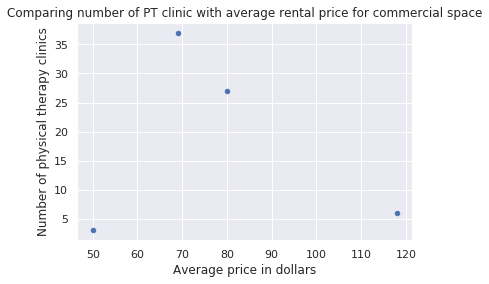

In [57]:
df_cluster_centers.plot(
    kind = 'scatter',
    x = 'rate',
    y = 'clinics',
    color='darkblue'
)
plt.title('Comparing number of PT clinic with average rental price for commercial space')
plt.xlabel('Average rental price in dollars')
plt.ylabel('Number of physical therapy clinics')

In [58]:
x = df_cluster_centers['rate']      
y = df_cluster_centers['clinics']   
fit = np.polyfit(x, y, deg=1)

fit

array([-0.08699624, 25.14445234])

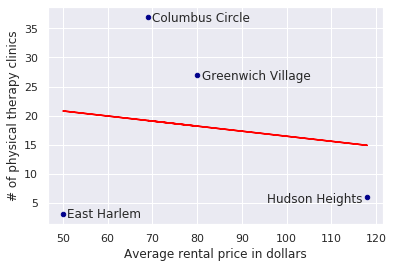

In [71]:
df_cluster_centers.plot(
    kind = 'scatter',
    x = 'rate',
    y = 'clinics',
    color='darkblue'
)

plt.xlabel('Average rental price in dollars')
plt.ylabel('# of physical therapy clinics')

plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.annotate('East Harlem', xy=(51, 2.5))
plt.annotate('Columbus Circle', xy=(70, 36.25))
plt.annotate('Greenwich Village', xy=(81, 26.25))
plt.annotate('Hudson Heights', xy=(95.5, 5))

plt.show()